You are provided with a datasetof  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the projectis to create a classifier capable of determining a plant's species from a photo

### Context:
Can you differentiate a weed from a crop seedling?

### Objective:
To implement the techniques learnt as a part of the course.
### Learning Outcomes:
Pre-processing of image data.
Visualization of images.
Building CNN.
Evaluate the Model.
The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

In [8]:
!pip install opencv-python

In [60]:
# Import the libraries, load dataset, print shape of data, visualize the images in dataset.
import cv2 # for image processing
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
# import for creating cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense

#Load the image file of dataset 
images = np.load('C:/Users/antarab/Desktop/aiml/CV/images.npy')

#Load the labels file of dataset 
labels = pd.read_csv('C:/Users/antarab/Desktop/aiml/CV/Labels.csv')

# Print the shape of Images and labels to ensure the dataset is loaded properly. 
print(images.shape) 
print(labels.shape) 

(4750, 128, 128, 3)
(4750, 1)


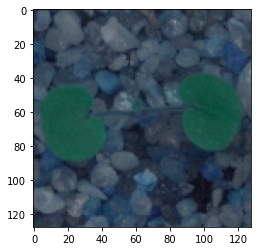

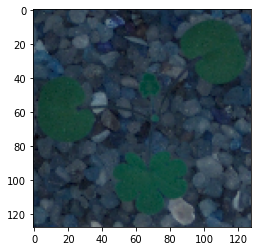

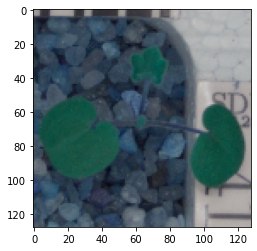

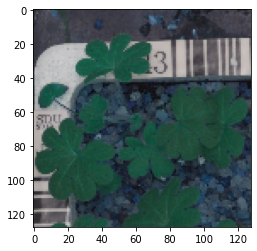

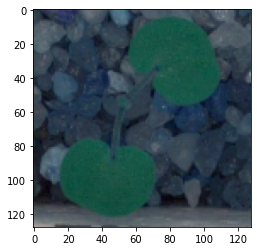

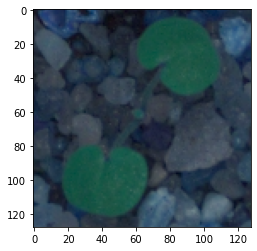

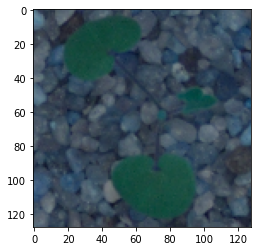

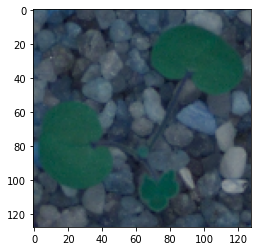

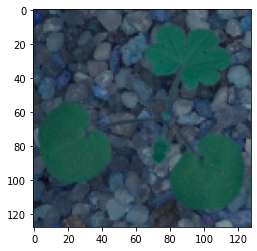

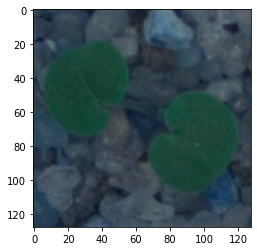

In [63]:
# visualize the images in dataset
for i in range(0,10):
    plt.imshow(images[i])
    plt.show()

In [2]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


### Data Pre-processing: (15 Marks)
a.Normalization.
b.Gaussian Blurring.
c.Visualize data after pre-processing.

In [28]:
# Normalization. # Normalize the data
images = images.astype('float32') / 255.0

In [296]:
# Gaussian Blurring. we can play around with various kernel size. here will try 7x7 and 5x5
# Now we apply the gaussian blur kernel (7X7) to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(images):
  images[idx] = cv2.GaussianBlur(img, (7, 7), cv2.BORDER_DEFAULT)

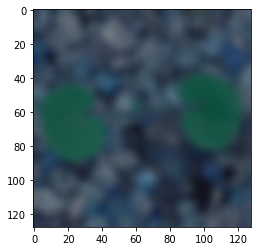

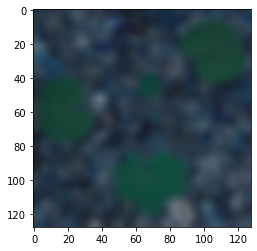

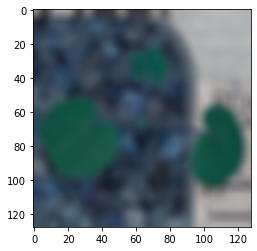

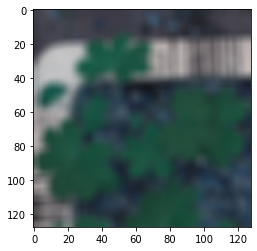

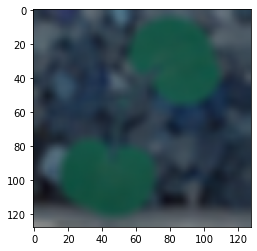

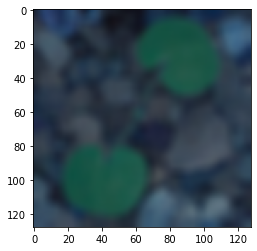

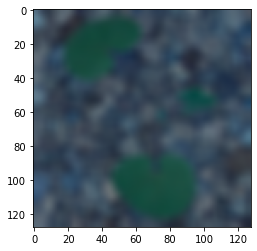

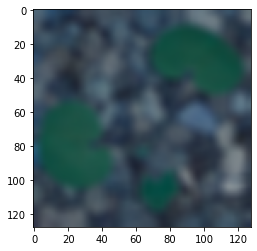

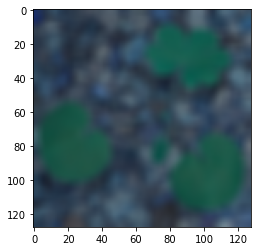

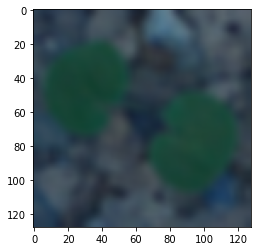

In [25]:
# Plot the de-noised image generated by applying Gaussian blur.
for i in range(0,10):
    plt.imshow(images[i], cmap='gray')
    plt.show()

In [29]:
# Gaussian Blurring.
# Now we apply the gaussian blur kernel (5X5) to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(images):
  images[idx] = cv2.GaussianBlur(img, (5, 5), 0)

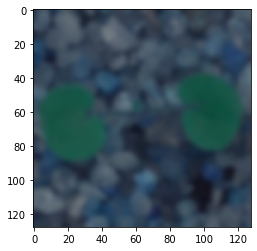

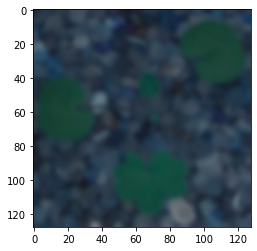

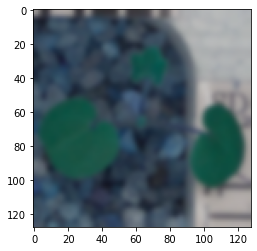

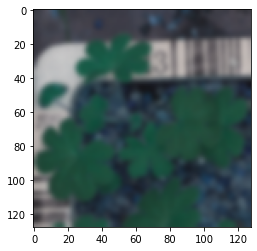

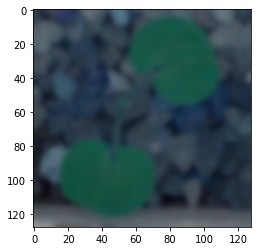

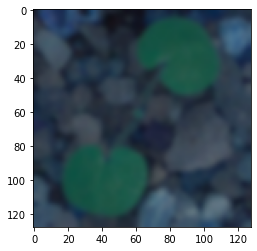

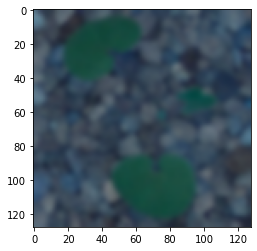

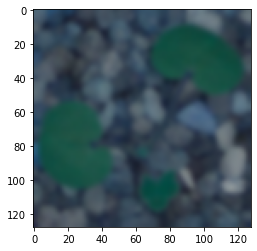

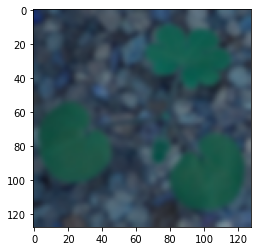

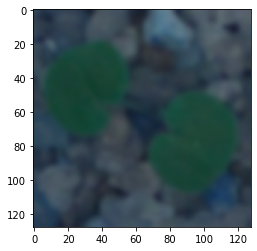

In [34]:
# Plot the de-noised image generated by applying Gaussian blur.
for i in range(0,10):
    plt.imshow(images[i], cmap='gray')
    plt.show()

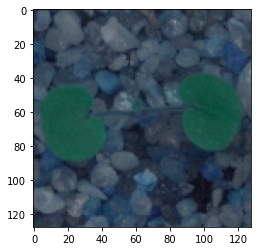

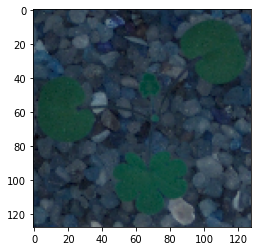

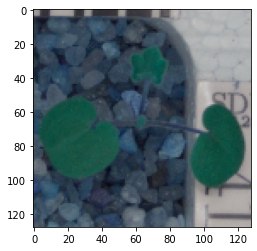

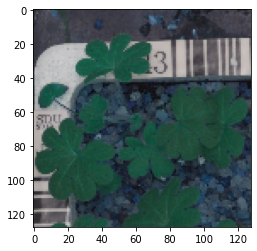

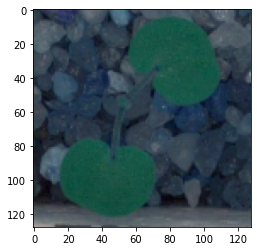

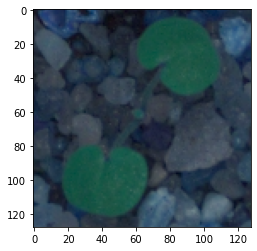

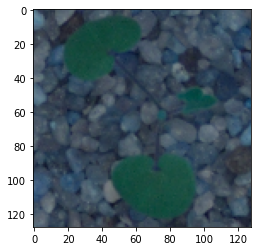

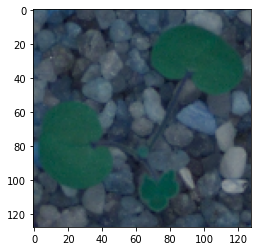

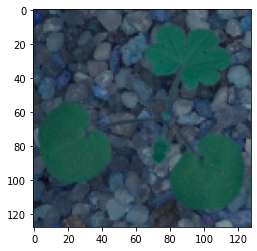

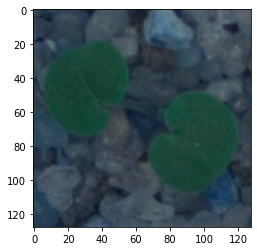

In [65]:
# c.Visualize data after pre-processing. this wilk take the lat
for i in range(0,10):
    plt.imshow(images[i])
    plt.show()

## Make data compatible: (10 Marks)
a.Convert labelsto one-hot-vectors.
b.Print the label for y_train[0].
c.Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
d.Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape


In [5]:
# Convert labels to one-hot-vectors
labels.head()

labels['Label'].unique()





array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [6]:
labels.nunique()

Label    12
dtype: int64

In [61]:
### One-hot encode the class vector
# - number of classes: 12
# - we are doing this to use categorical_crossentropy as loss

from tensorflow.keras.utils import to_categorical

# converting type of columns to 'category'
labels['Label'] = labels['Label'].astype('category')
# Assigning numerical values and storing in another column
print(labels['Label'],':',labels['Label'].cat.codes )
labels['Label'] = labels['Label'].cat.codes

labels = to_categorical(labels, num_classes=12)

print("Shape of labels:", labels.shape)


0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: category
Categories (12, object): [Black-grass, Charlock, Cleavers, Common Chickweed, ..., Scentless Mayweed, Shepherds Purse, Small-flowered Cranesbill, Sugar beet] : 0       10
1       10
2       10
3       10
4       10
        ..
4745     6
4746     6
4747     6
4748     6
4749     6
Length: 4750, dtype: int8
Shape of labels: (4750, 12)


In [53]:
# Print the label for y_train[0]
print("label for y_train[0]:", labels[0])

label for y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [31]:
# Split the dataset into training,testing, and validation set.
#(Hint: First split images andlabels into training and testing set with test_size = 0.3. 
#Then further split test data into test and validation set with test_size = 0.5)

import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.7, random_state=0)
X_test,X_val,  y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [10]:
# check the shapes
X_train.shape


(3325, 128, 128, 3)

In [32]:
X_train[0]

array([[[0.19105394, 0.23756129, 0.30753675],
        [0.17377453, 0.21749388, 0.28740808],
        [0.1418505 , 0.18103555, 0.2498162 ],
        ...,
        [0.5950981 , 0.5996324 , 0.6141851 ],
        [0.552114  , 0.5549326 , 0.5673101 ],
        [0.5404412 , 0.5416667 , 0.55024517]],

       [[0.1759804 , 0.22000614, 0.29010418],
        [0.16312806, 0.20583642, 0.27506128],
        [0.14203432, 0.18357843, 0.25059745],
        ...,
        [0.5911765 , 0.5955117 , 0.60978866],
        [0.5466759 , 0.5491422 , 0.5610601 ],
        [0.5346814 , 0.5355392 , 0.54375005]],

       [[0.16222428, 0.20870098, 0.27916667],
        [0.15582108, 0.20266545, 0.2715227 ],
        [0.15061274, 0.20027573, 0.26625308],
        ...,
        [0.5874847 , 0.5907322 , 0.6044118 ],
        [0.5412684 , 0.5428922 , 0.5538756 ],
        [0.52876836, 0.5291667 , 0.53661156]],

       ...,

       [[0.2918505 , 0.3515931 , 0.42120096],
        [0.28488052, 0.34626228, 0.41753983],
        [0.25151655, 0

In [16]:
X_test[0]

array([[[0.13958335, 0.30134806, 0.23970589],
        [0.1382353 , 0.30085784, 0.23900123],
        [0.12947305, 0.29666057, 0.23391545],
        ...,
        [0.22922796, 0.32852328, 0.38786763],
        [0.2203125 , 0.33057597, 0.39987743],
        [0.21305147, 0.3290441 , 0.40251225]],

       [[0.13229167, 0.295864  , 0.23495711],
        [0.13079044, 0.29509804, 0.23391545],
        [0.12329963, 0.2920803 , 0.22981004],
        ...,
        [0.21931681, 0.3130055 , 0.373989  ],
        [0.21282169, 0.3180147 , 0.38895527],
        [0.20735294, 0.3184743 , 0.39371935]],

       [[0.12282476, 0.28841913, 0.22968751],
        [0.12064951, 0.28722426, 0.22801776],
        [0.11416973, 0.28563115, 0.22501533],
        ...,
        [0.21364892, 0.29961705, 0.36047792],
        [0.20657171, 0.3036152 , 0.37435663],
        [0.20098038, 0.3037684 , 0.37931988]],

       ...,

       [[0.16314338, 0.15101103, 0.15977329],
        [0.19355085, 0.18068321, 0.18897058],
        [0.3078891 , 0

In [83]:
X_test.shape


(712, 128, 128, 3)

In [14]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [98]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [99]:
y_val[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
X_val[0]

array([[[0.12659314, 0.16654411, 0.23878677],
        [0.13143383, 0.16920955, 0.24090075],
        [0.14255515, 0.17555147, 0.24617036],
        ...,
        [0.16945465, 0.24889708, 0.33762258],
        [0.17429535, 0.25193015, 0.33961397],
        [0.17647061, 0.2533701 , 0.34062505]],

       [[0.12882966, 0.16930148, 0.2398897 ],
        [0.13423714, 0.17259498, 0.24257046],
        [0.14643076, 0.18014705, 0.24897365],
        ...,
        [0.1676777 , 0.24780945, 0.33687192],
        [0.17213541, 0.25058213, 0.3383885 ],
        [0.17408088, 0.25183824, 0.3391238 ]],

       [[0.13483457, 0.1765625 , 0.24313726],
        [0.14082414, 0.18062194, 0.24650736],
        [0.15399817, 0.18943015, 0.2541054 ],
        ...,
        [0.16260722, 0.24427085, 0.334375  ],
        [0.16669731, 0.24647671, 0.33514094],
        [0.16844364, 0.24742648, 0.33547798]],

       ...,

       [[0.2260723 , 0.33648902, 0.40278798],
        [0.22529106, 0.33638173, 0.40252757],
        [0.22247241, 0

In [317]:
X_val.shape

(713, 128, 128, 3)

In [85]:
y_train.shape

(3325, 12)

In [86]:
y_test.shape

(712, 12)

In [87]:
y_val.shape

(713, 12)

In [ ]:
# Reshape  data  into  shapes compatible with Keras models if it’s not already. 
#If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape


# sequential model in tensorflow keras expect the input dimension to be in format [no. of examples, height, width, channel]
# so in this case:

# height=128, width=128, channel=3 as RGB
# no. of examples for train, test and validation = 3325, 712 and 713 respectively

# since the x_train, x_val and x_test are all in the required format of [number of examples, height, width, channel] here
# we don't need to reshape them 

# Building CNN: (15 Marks)
a.Define layers.
b.Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.

In [17]:
#Define layers

# we start with simple architecture first... 
# 2 layers of covolution
# no pooling
# flatten and then dense layers

# further down I have used various other models as well... in total there are 3 types of models that are evaluated.
# this is Model-1


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=5, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

In [18]:
# Compile the model
# Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


### Fit and evaluate model and print confusion matrix. (10 Marks)

In [19]:

# Fit the model

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

Epoch 1/10
104/104 [==============================] - 82s 786ms/step - loss: 2.6362 - accuracy: 0.1615 - val_loss: 2.0715 - val_accuracy: 0.3114
Epoch 2/10
104/104 [==============================] - 82s 784ms/step - loss: 1.8805 - accuracy: 0.4078 - val_loss: 1.8974 - val_accuracy: 0.3899
Epoch 3/10
104/104 [==============================] - 83s 796ms/step - loss: 1.6276 - accuracy: 0.5014 - val_loss: 1.7595 - val_accuracy: 0.4474
Epoch 4/10
104/104 [==============================] - 81s 783ms/step - loss: 1.3829 - accuracy: 0.5660 - val_loss: 1.8161 - val_accuracy: 0.4306
Epoch 5/10
104/104 [==============================] - 81s 783ms/step - loss: 1.0693 - accuracy: 0.6665 - val_loss: 2.1393 - val_accuracy: 0.3899
Epoch 6/10
104/104 [==============================] - 81s 781ms/step - loss: 0.7527 - accuracy: 0.7726 - val_loss: 2.1292 - val_accuracy: 0.4011
Epoch 7/10
104/104 [==============================] - 81s 781ms/step - loss: 0.5404 - accuracy: 0.8484 - val_loss: 2.2671 - val_ac

In [20]:
model.evaluate(X_test, y_test)
y_test
# we get the test accuracy as 37% so will try to add more layers,  val accuracy is also ~39% but training accuracy is 97.8%
# this means it's highly overfitting
# in next model we will dropout some neurons


23/23 [==============================] - 3s 122ms/step - loss: 3.5187 - accuracy: 0.3708


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [33]:
# now we add layers to improve the model
# this is our Model-2

from tensorflow.keras.layers import MaxPooling2D, Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128,128,3), activation='relu')) 
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2, 2)))
#drop out to reduce overfitting
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(12, activation='softmax'))  

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1)

model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
 

In [34]:
# change the image shape from 128,128,3 to 224,224, 3
print(images.shape)

# PLEASE IGNORE THE COMMENTED CODE, THIS IS FOR RESIZING THE IMAGE ... WHICH I HAVE NOT USED
# BUT WANTED TO KEEP FOR REFERENCE

# import cv2
# import numpy as np


# #Load the image file of dataset
# images = np.load('C:/Users/antarab/Desktop/aiml/CV/images.npy')

# from PIL import Image
# from numpy import asarray

# new_images=[]
# for i in range(0,len(images)):
#     img = Image.fromarray(images[i])
#     img=img.resize(size=(64, 64))
# #     print('*****************************')
# #     print(asarray(img).shape)
#     new_images.append(asarray(img))
    
# # print(type(images))
# # print(type(new_images)) 
# new_images=np.array(new_images)

# # print(type(new_images)) 
# new_images = new_images.astype('float32') / 255.0
# print(new_images.shape)

# for idx, img in enumerate(new_images):
#   new_images[idx] = cv2.GaussianBlur(img, (5, 5), 0)


model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=16,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

model.summary()

(4750, 128, 128, 3)
Epoch 1/16
52/52 [==============================] - 57s 1s/step - loss: 2.6731 - accuracy: 0.1946 - val_loss: 2.5187 - val_accuracy: 0.1262
Epoch 2/16
52/52 [==============================] - 57s 1s/step - loss: 1.8093 - accuracy: 0.4060 - val_loss: 2.7026 - val_accuracy: 0.1262
Epoch 3/16
52/52 [==============================] - 56s 1s/step - loss: 1.3864 - accuracy: 0.5299 - val_loss: 3.1662 - val_accuracy: 0.1262
Epoch 4/16
52/52 [==============================] - 57s 1s/step - loss: 1.1447 - accuracy: 0.6138 - val_loss: 3.8413 - val_accuracy: 0.0533
Epoch 5/16
52/52 [==============================] - 57s 1s/step - loss: 0.9650 - accuracy: 0.6809 - val_loss: 4.4780 - val_accuracy: 0.1178
Epoch 6/16
52/52 [==============================] - 57s 1s/step - loss: 0.8058 - accuracy: 0.7320 - val_loss: 4.9875 - val_accuracy: 0.1276
Epoch 7/16
52/52 [==============================] - 57s 1s/step - loss: 0.7245 - accuracy: 0.7546 - val_loss: 4.8832 - val_accuracy: 0.1192


In [175]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [35]:
model.evaluate(X_test, y_test)
# The test accuracy have improved but not good yet
# next I will try transfer learning and use VGG16 model

23/23 [==============================] - 1s 61ms/step - loss: 2.2951 - accuracy: 0.4228


[2.295130491256714, 0.4227527976036072]

In [40]:
# using VGG16 model and then passing the output to the dense layer after flattening
# this is my model-3

from keras.applications.vgg16 import VGG16
import tensorflow.keras

# We will be loading VGG-16 with pretrained imagenet weights.
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))

# Flatten the vgg lower layer output and create Dense layer with activation softmax.
x=Flatten()(vgg.output)

prediction=Dense(12,activation='softmax')(x)
model= tensorflow.keras.Model(inputs=vgg.input,outputs=prediction)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1)

# Compile Model using Adam optimizer as mentioned in the question
model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])


In [41]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=16,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

model.summary()

Epoch 1/16
52/52 [==============================] - 371s 7s/step - loss: 2.4125 - accuracy: 0.1820 - val_loss: 2.1879 - val_accuracy: 0.2847
Epoch 2/16
52/52 [==============================] - 371s 7s/step - loss: 1.7374 - accuracy: 0.4265 - val_loss: 1.4162 - val_accuracy: 0.5133
Epoch 3/16
52/52 [==============================] - 373s 7s/step - loss: 1.1100 - accuracy: 0.6292 - val_loss: 1.0657 - val_accuracy: 0.6325
Epoch 4/16
52/52 [==============================] - 370s 7s/step - loss: 0.7097 - accuracy: 0.7552 - val_loss: 0.7036 - val_accuracy: 0.7433
Epoch 5/16
52/52 [==============================] - 371s 7s/step - loss: 0.5836 - accuracy: 0.7997 - val_loss: 0.5526 - val_accuracy: 0.8036
Epoch 6/16
52/52 [==============================] - 368s 7s/step - loss: 0.4038 - accuracy: 0.8674 - val_loss: 0.5317 - val_accuracy: 0.8219
Epoch 7/16
52/52 [==============================] - 372s 7s/step - loss: 0.2845 - accuracy: 0.9083 - val_loss: 0.5310 - val_accuracy: 0.8261
Epoch 8/16
52

In [42]:
model.evaluate(X_test, y_test)

# this gave a good accuracy of ~88%. so I will not use any further model to evaluate
# this would be our final model

23/23 [==============================] - 16s 707ms/step - loss: 0.4437 - accuracy: 0.8792


[0.443663090467453, 0.8792135119438171]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred= model.predict(X_test)
y_pred
new_pred=[]
for i in range(0,len(y_pred)):
#     print(y_pred[i])
    new_pred.append(y_pred[i].argmax())
new_pred


new_test=[]
for i in range(0,len(y_test)):
#     print(y_pred[i])
    new_test.append(y_test[i].argmax())
new_test


[8,
 5,
 7,
 10,
 8,
 6,
 3,
 5,
 10,
 4,
 5,
 3,
 8,
 5,
 8,
 6,
 5,
 5,
 0,
 9,
 11,
 11,
 6,
 6,
 3,
 11,
 10,
 2,
 2,
 5,
 10,
 8,
 6,
 3,
 11,
 8,
 5,
 2,
 5,
 8,
 8,
 11,
 9,
 0,
 2,
 3,
 3,
 5,
 3,
 11,
 2,
 3,
 8,
 2,
 11,
 5,
 5,
 6,
 1,
 11,
 6,
 4,
 6,
 10,
 11,
 11,
 7,
 6,
 1,
 5,
 3,
 11,
 3,
 10,
 6,
 6,
 5,
 11,
 6,
 11,
 5,
 10,
 2,
 7,
 10,
 5,
 11,
 6,
 6,
 6,
 6,
 10,
 11,
 11,
 2,
 10,
 9,
 11,
 0,
 6,
 0,
 1,
 3,
 3,
 6,
 10,
 0,
 3,
 8,
 7,
 5,
 2,
 2,
 6,
 2,
 6,
 0,
 3,
 5,
 3,
 0,
 11,
 1,
 2,
 9,
 5,
 5,
 1,
 5,
 10,
 10,
 8,
 8,
 0,
 2,
 11,
 5,
 3,
 4,
 3,
 10,
 3,
 1,
 3,
 6,
 9,
 3,
 1,
 9,
 5,
 8,
 6,
 5,
 2,
 5,
 3,
 0,
 2,
 11,
 6,
 6,
 2,
 10,
 2,
 0,
 8,
 5,
 2,
 2,
 11,
 2,
 6,
 6,
 6,
 9,
 1,
 9,
 1,
 3,
 11,
 3,
 11,
 3,
 11,
 4,
 8,
 10,
 1,
 9,
 3,
 3,
 8,
 4,
 11,
 5,
 11,
 6,
 6,
 1,
 10,
 6,
 0,
 5,
 3,
 1,
 5,
 9,
 9,
 5,
 5,
 3,
 11,
 8,
 5,
 3,
 3,
 6,
 3,
 3,
 11,
 7,
 8,
 10,
 8,
 5,
 10,
 0,
 7,
 8,
 5,
 5,
 6,
 5,
 3,
 9,
 11,
 8,
 7,


In [44]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(new_test, new_pred)
print(cm)

=== Confusion Matrix ===
[[20  0  0  0  1  0 16  0  0  0  0  0]
 [ 0 49  0  0  0  1  0  0  0  0  0  0]
 [ 0  0 47  2  1  0  0  0  0  0  1  0]
 [ 0  0  0 90  0  0  0  0  2  2  1  0]
 [ 7  0  0  0 26  1  0  0  0  0  0  1]
 [ 0  4  1  0  0 72  0  1  0  0  0  7]
 [14  0  0  0  1  0 80  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 21  1  0  0  4]
 [ 0  0  0  0  0  0  0  0 76  1  0  0]
 [ 0  0  0  1  0  0  0  0  8 31  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 60  0]
 [ 0  0  3  1  1  0  0  1  0  0  0 54]]


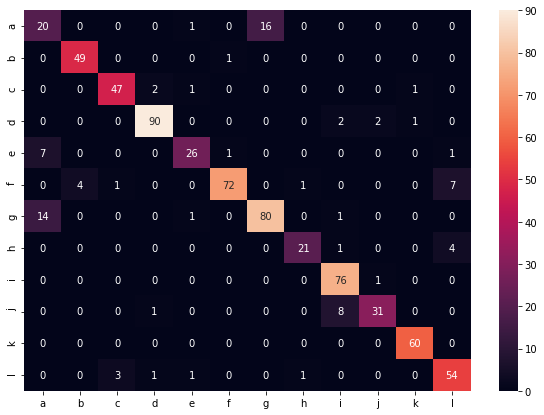

In [45]:
df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijkl"],
                     columns = [i for i in "abcdefghijkl"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

# there are couple of wrong predictions but overall its good

## Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

11
7


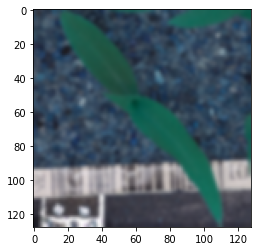

In [54]:
# we have the label encoded as

# 'Black-grass' = 0
# 'Charlock' = 1 
# 'Cleavers' = 2
# 'Common Chickweed' = 3
# 'Common wheat' = 4
# 'Fat Hen' =  5
# 'Loose Silky-bent' =  6
# 'Maize' = 7
# 'Scentless Mayweed' = 8
# 'Shepherds Purse' = 9
# 'Small-flowered Cranesbill' = 10
# 'Sugar beet' = 11

y_pred2= model.predict(X_test[2].reshape(1, 128, 128, 3))
print(y_pred2.argmax()) # predicted 'Sugar beet'

print(y_test[2].argmax()) # actual 'Maize'

plt.imshow(X_test[2])
plt.show()

10
10


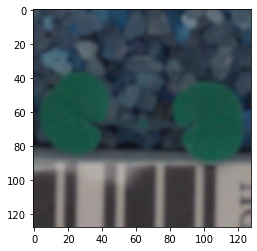

In [55]:
y_pred3= model.predict(X_test[3].reshape(1, 128, 128, 3))
print(y_pred3.argmax()) # predicted 'Small-flowered Cranesbill'

print(y_test[3].argmax()) # actual 'Small-flowered Cranesbill'

plt.imshow(X_test[3])
plt.show()

3
3


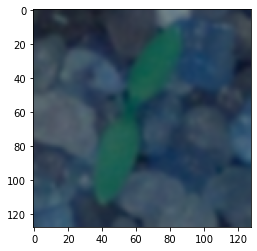

In [56]:
y_pred33= model.predict(X_test[33].reshape(1, 128, 128, 3))
print(y_pred33.argmax()) # predicted 'Common Chickweed'

print(y_test[33].argmax()) # actual 'Common Chickweed'

plt.imshow(X_test[33])
plt.show()

5
5


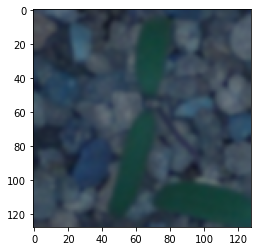

In [57]:
y_pred36= model.predict(X_test[36].reshape(1, 128, 128, 3))
print(y_pred36.argmax()) # predicted 'Fat Hen'

print(y_test[36].argmax()) # actual 'Fat Hen'

plt.imshow(X_test[36])
plt.show()

3
11


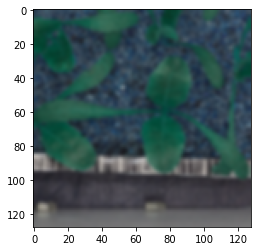

In [62]:
y_pred59= model.predict(X_test[59].reshape(1, 128, 128, 3))
print(y_pred59.argmax()) # predicted 'Common Chickweed'

print(y_test[59].argmax()) # actual 'Sugar beet'

plt.imshow(X_test[59])
plt.show()